In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [29]:
!pwd
%cd ./drive/My Drive/Colab Notebooks/UniverseDacon/
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
sample_submission = pd.read_csv('sample_submission.csv', index_col=0)
sample_submission.describe()

/content/drive/My Drive/Colab Notebooks/UniverseDacon
[Errno 2] No such file or directory: './drive/My Drive/Colab Notebooks/UniverseDacon/'
/content/drive/My Drive/Colab Notebooks/UniverseDacon


,STAR_WHITE_DWARF,STAR_CATY_VAR,STAR_BROWN_DWARF,SERENDIPITY_RED,REDDEN_STD,STAR_BHB,GALAXY,SERENDIPITY_DISTANT,QSO,SKY,STAR_RED_DWARF,ROSAT_D,STAR_PN,SERENDIPITY_FIRST,STAR_CARBON,SPECTROPHOTO_STD,STAR_SUB_DWARF,SERENDIPITY_MANUAL,SERENDIPITY_BLUE
count,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
# TRAIN 데이터의 TYPE을 SAMPLE_SUBMISSION에 대응하는 가변수 형태로 변환시킵니다.
column_number = {}
for i, column in enumerate(sample_submission.columns):
    column_number[column] = i
    
def to_number(x, dic):
    return dic[x]

train['type_num'] = train['type'].apply(lambda x: to_number(x, column_number))

밑에 코드는 5000개씩으로 sampling (up & down)

In [0]:
# from collections import Counter
# print(sorted(Counter(train['type_num']).items()))
# type0 = train[train['type_num']==1]
# type1 = train[train['type_num']==4]
# type2 = train[train['type_num']==5]
# type3 = train[train['type_num']==6]
# type4 = train[train['type_num']==8]
# type5 = train[train['type_num']==10]
# type6 = train[train['type_num']==11]
# type7 = train[train['type_num']==13]
# type8 = train[train['type_num']==15]
# type9 = train[train['type_num']==18]
# type10 = train[train['type_num']==0]
# type11 = train[train['type_num']==2]
# type12 = train[train['type_num']==3]
# type13 = train[train['type_num']==7]
# type14 = train[train['type_num']==9]
# type15 = train[train['type_num']==12]
# type16 = train[train['type_num']==14]
# type17 = train[train['type_num']==16]
# type18 = train[train['type_num']==17]
# unsam_train0 = type0.sample(5000)
# unsam_train1 = type1.sample(5000)
# unsam_train2 = type2.sample(5000)
# unsam_train3 = type3.sample(5000)
# unsam_train4 = type4.sample(5000)
# unsam_train5 = type5.sample(5000)
# unsam_train6 = type6.sample(5000)
# unsam_train7 = type7.sample(5000)
# unsam_train8 = type8.sample(5000)
# unsam_train9 = type9.sample(5000)
# type10, type
# unsam_train = pd.concat([unsam_train0, unsam_train1, unsam_train2, unsam_train3, unsam_train4, unsam_train5, unsam_train6, unsam_train7, unsam_train8, unsam_train9, type10, type11, type12, type13, type14, type15, type16, type17, type18],axis=0)
# print(sorted(Counter(unsam_train['type_num']).items()))


train heatmap

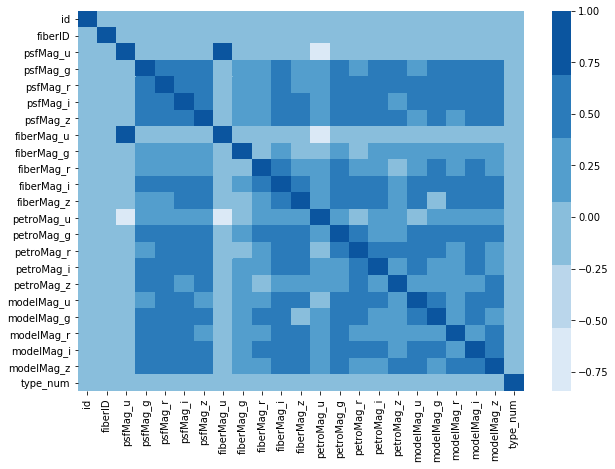

In [31]:
corr = train.corr()
cmap = sns.color_palette("Blues")
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, cmap=cmap)

test heatmap

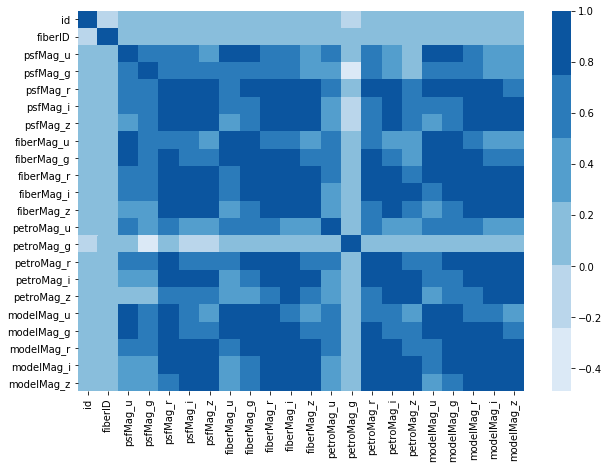

In [32]:
corr = test.corr()
cmap = sns.color_palette("Blues")
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, cmap=cmap)

train 에서 type column 을 없애고 test 랑 합쳐서 .

IQR 방법으로 Outlier 제거.

In [33]:
y_train = train['type_num']
train_wo_type = train.drop(columns=['type','type_num','fiberID'], axis=1)
test = test.drop(columns=['fiberID'])
total = pd.concat([train_wo_type, test])
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210000 entries, 0 to 10008
Data columns (total 21 columns):
id            210000 non-null int64
psfMag_u      210000 non-null float64
psfMag_g      210000 non-null float64
psfMag_r      210000 non-null float64
psfMag_i      210000 non-null float64
psfMag_z      210000 non-null float64
fiberMag_u    210000 non-null float64
fiberMag_g    210000 non-null float64
fiberMag_r    210000 non-null float64
fiberMag_i    210000 non-null float64
fiberMag_z    210000 non-null float64
petroMag_u    210000 non-null float64
petroMag_g    210000 non-null float64
petroMag_r    210000 non-null float64
petroMag_i    210000 non-null float64
petroMag_z    210000 non-null float64
modelMag_u    210000 non-null float64
modelMag_g    210000 non-null float64
modelMag_r    210000 non-null float64
modelMag_i    210000 non-null float64
modelMag_z    210000 non-null float64
dtypes: float64(20), int64(1)
memory usage: 35.2 MB


Train + Test Heatmap

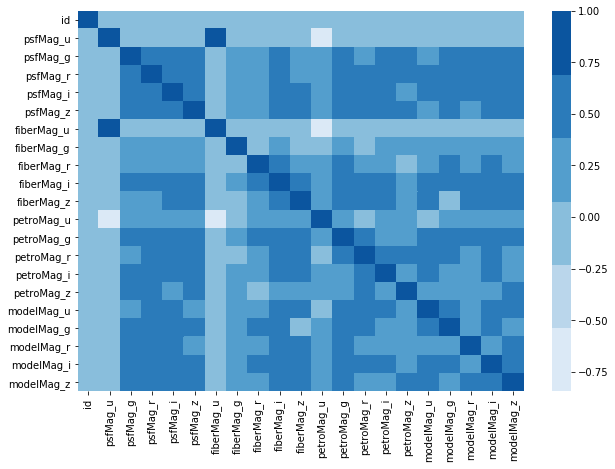

In [34]:
corr = total.corr()
cmap = sns.color_palette("Blues")
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, cmap=cmap)

In [0]:
# from collections import Counter
# def detect_outliers(df, n, features): 
#   outlier_indices = [] 
#   for col in features:
#     if col == 'type' or col == 'id':
#       continue; 
#     Q1 = np.percentile(df[col], 25) 
#     Q3 = np.percentile(df[col], 75) 
#     IQR = Q3 - Q1 

#     outlier_step =  IQR 
#     outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index 
#     outlier_indices.extend(outlier_list_col) 

#   outlier_indices = Counter(outlier_indices) 
#   multiple_outliers = list(k for k, v in outlier_indices.items() if v > n) 
#   print()
#   return multiple_outliers 

# features = total.columns
# print(features)
# dup = detect_outliers(total, 2, features)

# print(len(dup))

# filter(lambda a: a < 199991, dup)
# print(len(dup))

# train = train.drop(dup)
# y_train = train['type']
# X_train = train.drop(columns=['type','type_num','fiberID'], axis=1)
# print(len(train))

In [0]:
y_train.describe()
X_train = train.drop(columns=['type','type_num','fiberID'], axis=1)

In [0]:
# from imblearn.over_sampling import SMOTE
# X_train = train_wo_type
# X_train, y_train = SMOTE(random_state=0).fit_sample(X_train,y_train)

In [38]:
pd.DataFrame(X_train).describe()

,id,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
count,199991.00000,1.999910e+05,199991.000000,199991.000000,199991.000000,199991.000000,1.999910e+05,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000
mean,99995.00000,-6.750146e+00,18.675373,18.401235,18.043495,17.663526,1.084986e+01,19.072693,19.134483,18.183331,18.000882,21.837903,18.454136,18.481525,17.686617,17.699207,20.110991,18.544375,18.181544,17.692395,17.189281
std,57732.57318,1.187678e+04,155.423024,127.128078,116.622194,123.735298,4.172116e+03,749.256162,90.049058,122.378972,145.862346,789.472333,154.376277,97.240448,145.730872,142.691880,122.299062,161.728183,133.984475,131.183416,133.685138
min,0.00000,-5.310802e+06,-40022.466071,-27184.795793,-26566.310827,-24878.828280,-1.864766e+06,-215882.917191,-21802.656144,-20208.516262,-26505.602101,-24463.431833,-25958.752324,-23948.588523,-40438.184078,-30070.729379,-26236.578659,-36902.402336,-36439.638493,-38969.416822,-26050.710196
25%,49997.50000,1.965259e+01,18.701180,18.048572,17.747663,17.425523,1.994040e+01,18.902851,18.259352,17.903615,17.606148,19.247795,18.113933,17.479794,17.050294,16.804705,19.266214,18.076120,17.423425,16.977671,16.705774
50%,99995.00000,2.087136e+01,19.904235,19.454492,19.043895,18.611799,2.104910e+01,20.069038,19.631419,19.188763,18.710967,20.366848,19.586559,19.182789,18.693370,18.174592,20.406840,19.547674,19.143156,18.641756,18.100997
75%,149992.50000,2.216043e+01,21.150297,20.515936,20.073528,19.883760,2.233754e+01,21.385830,20.773911,20.331419,20.133179,21.797480,21.004397,20.457491,20.019112,19.807652,21.992898,20.962386,20.408140,19.968846,19.819554
max,199990.00000,1.877392e+04,3538.984910,3048.110913,4835.218639,9823.740407,4.870154e+03,248077.513380,12084.735440,8059.638535,18358.921741,298771.019041,12139.815877,7003.136546,9772.190537,17403.789263,14488.251976,10582.058590,12237.951703,4062.499371,7420.534172


In [0]:
total = pd.concat([train_wo_type, test])

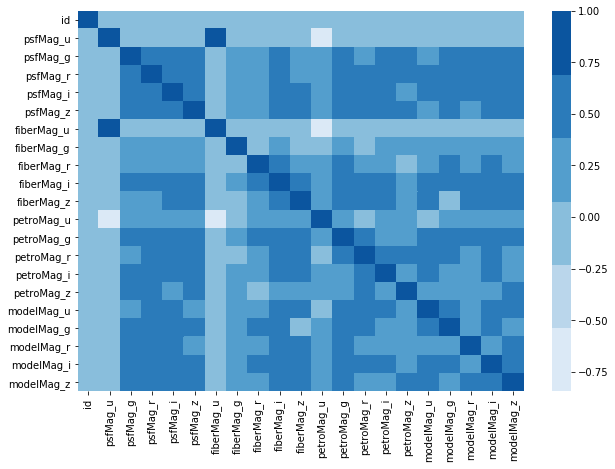

In [40]:
corr = total.corr()
cmap = sns.color_palette("Blues")
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, cmap=cmap)

In [0]:
y_train = train['type_num']
X_train = train.drop(columns=['type','type_num','fiberID'], axis=1)

LDA해서 변수 줄여보자

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=8)
lda.fit(X_train,y_train)
data_lda = lda.transform(X_train)
test_lda = lda.transform(test)
data_lda.shape
data_lda = pd.DataFrame(data_lda)

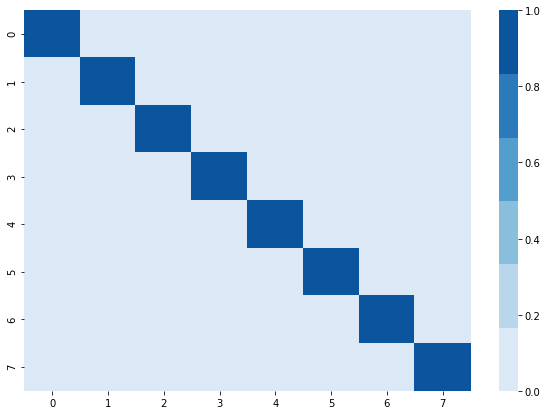

In [43]:
corr = data_lda.corr()
cmap = sns.color_palette("Blues")
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, cmap=cmap)

In [44]:
data_lda.describe()

,0,1,2,3,4,5,6,7
count,1.999910e+05,1.999910e+05,1.999910e+05,1.999910e+05,1.999910e+05,1.999910e+05,1.999910e+05,1.999910e+05
mean,-1.772123e-15,-2.437187e-15,-4.756452e-16,7.518171e-16,1.785198e-15,5.054312e-16,-4.078117e-16,1.156588e-16
std,1.001082e+00,1.000555e+00,1.000210e+00,1.000132e+00,1.000099e+00,1.000065e+00,1.000037e+00,1.000023e+00
min,-2.471624e+02,-1.633784e+02,-1.512317e+02,-2.971201e+02,-1.236860e+02,-1.400721e+02,-1.147065e+02,-1.928748e+02
25%,-5.113022e-02,-2.836901e-02,-7.245980e-02,-6.301732e-02,-1.705479e-01,-9.129089e-03,-5.393172e-02,-2.007754e-01
50%,3.477186e-03,-5.939512e-03,-4.459889e-03,3.041713e-03,-2.891543e-03,-1.419895e-03,-1.325445e-03,2.002447e-03
75%,5.911897e-02,2.500284e-02,6.359324e-02,6.882831e-02,1.648503e-01,6.096174e-03,5.134164e-02,2.049440e-01
max,8.553623e+01,1.632935e+02,1.794278e+02,1.153007e+02,3.164742e+02,2.070742e+02,2.885312e+02,1.669673e+02


In [45]:
test_lda = pd.DataFrame(test_lda)
test_lda.describe()

,0,1,2,3,4,5,6,7
count,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000
mean,0.110357,0.026299,0.137814,-0.136127,0.349174,0.012444,0.108682,0.428277
std,0.059468,0.064839,0.025899,0.027981,0.025329,0.098117,0.060166,0.016085
min,-3.308157,-0.725944,-1.101627,-2.492799,-1.665031,-9.648878,-5.841260,0.076675
25%,0.079672,-0.000446,0.125298,-0.144713,0.340184,0.008099,0.105506,0.417735
50%,0.116336,0.015654,0.136300,-0.135081,0.349588,0.012388,0.109952,0.428304
75%,0.140697,0.049313,0.150814,-0.126079,0.358818,0.016926,0.113592,0.438497
max,0.678731,5.036519,0.779757,0.093405,0.590195,0.484681,0.413035,1.012865


In [46]:
data_lda['type'] = y_train
data_lda.describe()


,0,1,2,3,4,5,6,7,type
count,1.999910e+05,1.999910e+05,1.999910e+05,1.999910e+05,1.999910e+05,1.999910e+05,1.999910e+05,1.999910e+05,199991.000000
mean,-1.772123e-15,-2.437187e-15,-4.756452e-16,7.518171e-16,1.785198e-15,5.054312e-16,-4.078117e-16,1.156588e-16,8.877339
std,1.001082e+00,1.000555e+00,1.000210e+00,1.000132e+00,1.000099e+00,1.000065e+00,1.000037e+00,1.000023e+00,4.624156
min,-2.471624e+02,-1.633784e+02,-1.512317e+02,-2.971201e+02,-1.236860e+02,-1.400721e+02,-1.147065e+02,-1.928748e+02,0.000000
25%,-5.113022e-02,-2.836901e-02,-7.245980e-02,-6.301732e-02,-1.705479e-01,-9.129089e-03,-5.393172e-02,-2.007754e-01,6.000000
50%,3.477186e-03,-5.939512e-03,-4.459889e-03,3.041713e-03,-2.891543e-03,-1.419895e-03,-1.325445e-03,2.002447e-03,8.000000
75%,5.911897e-02,2.500284e-02,6.359324e-02,6.882831e-02,1.648503e-01,6.096174e-03,5.134164e-02,2.049440e-01,11.000000
max,8.553623e+01,1.632935e+02,1.794278e+02,1.153007e+02,3.164742e+02,2.070742e+02,2.885312e+02,1.669673e+02,18.000000


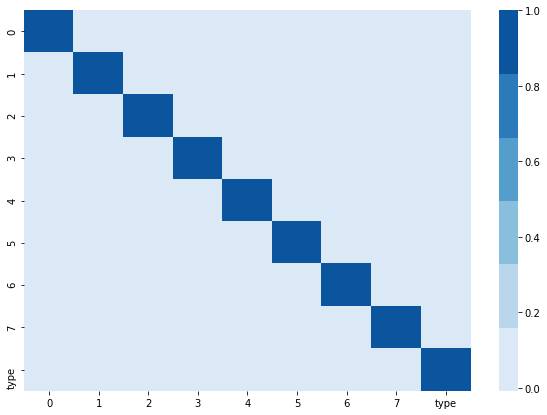

In [47]:
corr = data_lda.corr()
cmap = sns.color_palette("Blues")
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, cmap=cmap)

In [0]:
data_lda = data_lda.drop(columns=['type'], axis=1)

In [0]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
# from sklearn.preprocessing import minmax_scale
# #Scaler = StandardScaler()
# #Scaler = MinMaxScaler()
# Scaler = RobustScaler()

# total[['psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i', 'psfMag_z', 'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i','fiberMag_z', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i','petroMag_z', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i','modelMag_z']] = Scaler.fit_transform(total[['psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i','psfMag_z', 'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i','fiberMag_z', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i','petroMag_z', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i','modelMag_z']])
# total.describe()
# X_train = total.iloc[:64488]
# test = total.iloc[64488:]
# X_train.describe()


오버샘플링.

In [0]:
# from imblearn.over_sampling import SMOTE

# X_train, y_train = SMOTE(random_state=0).fit_sample(X_train,y_train)

8     49680
6     37347
18    21760
15    14630
4     14618
10    13750
5     13500
13     7132
11     6580
1      6506
7      4654
14     3257
3      2562
0      2160
16     1154
2       500
9       127
17       61
12       13
Name: type_num, dtype: int64


Text(0.5, 1.0, 'type Values in the Training Set - train()')

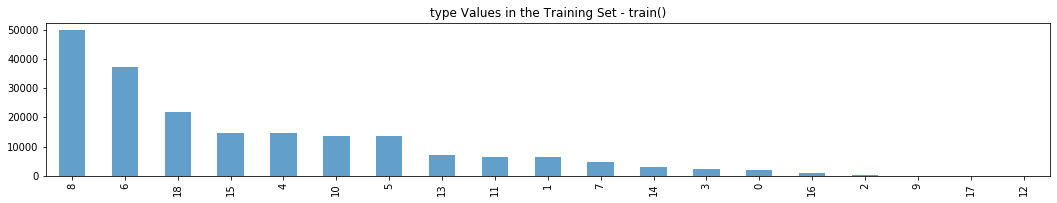

In [50]:
%matplotlib inline

print(y_train.value_counts())
fig = plt.figure(figsize=(18,9))
plt.subplots_adjust(hspace=0.1)

plt.subplot2grid((3,3), (0,0), colspan=3)
y_train.value_counts()[:100].plot(kind='bar', alpha=0.7)
plt.title('type Values in the Training Set - train()')

In [51]:
test.describe()

,id,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
count,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000
mean,204995.000000,20.987400,19.878440,19.280218,18.873165,18.618385,21.184506,20.091376,19.497732,19.083329,18.826624,20.715429,19.462021,18.995001,18.616519,18.411996,20.739001,19.534844,18.935095,18.522308,18.281069
std,2889.493756,2.111703,2.573890,1.709344,1.720713,1.702236,1.990940,1.865064,1.710070,1.633953,1.711790,2.807434,13.971203,1.979225,1.970463,2.373022,2.187025,1.957506,1.856617,1.796820,1.867582
min,199991.000000,-7.248195,-42.663871,9.134712,-22.522266,13.349827,9.390439,8.188752,12.288183,12.688984,-8.455932,-98.181975,-1348.068776,-23.908952,-8.356654,-64.917293,12.419765,13.617577,13.382832,12.955113,12.395695
25%,202493.000000,19.655525,18.671025,18.037847,17.742016,17.424701,19.940430,18.892043,18.253627,17.905253,17.610776,19.249432,18.104265,17.475078,17.043615,16.805557,19.268471,18.064625,17.424393,16.971911,16.715685
50%,204995.000000,20.854404,19.910333,19.444925,19.033283,18.594713,21.040735,20.071658,19.627904,19.180605,18.699819,20.371014,19.582955,19.197068,18.684269,18.171966,20.412702,19.541261,19.155839,18.635195,18.095883
75%,207497.000000,22.160801,21.150040,20.489912,20.083814,19.878652,22.339213,21.402558,20.756306,20.331848,20.119736,21.803705,21.025719,20.428279,20.015701,19.815916,21.992969,20.981396,20.389215,19.970657,19.823902
max,209999.000000,37.681143,182.654452,31.883768,47.227391,34.946057,41.169991,47.160580,29.266687,31.146742,26.478564,65.392087,106.962571,41.850633,52.221528,74.747394,32.641240,28.814977,27.579664,26.471555,24.461973


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(data_lda.values, y_train.values, \
                                                  test_size=0.2, random_state=0)

In [0]:
# from sklearn.utils import class_weight
# class_weights = list(class_weight.compute_class_weight('balanced',
#                                              np.unique(train['type_num']),
#                                              train['type_num']))

# w_array = np.ones(y_train.shape[0], dtype = 'float')
# for i, val in enumerate(y_train):
#     w_array[i] = class_weights[val-1]

In [0]:
# from imblearn.over_sampling import SMOTE

# X_train, y_train = SMOTE(random_state=0).fit_sample(X_train,y_train)

In [55]:
%%time
from xgboost import XGBClassifier

XGB_clf = XGBClassifier(max_depth = 20,n_esetimators=1500, n_jobs=-1, random_state=0)
XGB_clf.get_params()
XGB_clf.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)], early_stopping_rounds=7)#, sample_weight=w_array)

[0]	validation_0-merror:0.181378	validation_1-merror:0.236531
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 7 rounds.
[1]	validation_0-merror:0.158764	validation_1-merror:0.219705
[2]	validation_0-merror:0.145907	validation_1-merror:0.215305
[3]	validation_0-merror:0.135782	validation_1-merror:0.211755
[4]	validation_0-merror:0.1282	validation_1-merror:0.20923
[5]	validation_0-merror:0.120519	validation_1-merror:0.20778
[6]	validation_0-merror:0.114668	validation_1-merror:0.20693
[7]	validation_0-merror:0.109855	validation_1-merror:0.206405
[8]	validation_0-merror:0.104655	validation_1-merror:0.205455
[9]	validation_0-merror:0.100161	validation_1-merror:0.20433
[10]	validation_0-merror:0.096086	validation_1-merror:0.20348
[11]	validation_0-merror:0.092317	validation_1-merror:0.202855
[12]	validation_0-merror:0.088392	validation_1-merror:0.203005
[13]	validation_0-merror:0.084779	va

In [0]:
XGB_pred = XGB_clf.predict_proba(test_lda)
submission = pd.DataFrame(data=XGB_pred, columns=sample_submission.columns, index=sample_submission.index)
submission.to_csv('XGBPreprocess.csv', index=True)
submission.describe()